# Student Alcohol Consumption Analysiss


## Introduction
This Jupyter Notebook aims to analyze the factors influencing alcohol consumption among secondary school students. By exploring the dataset, we will gain insights into how various social, educational, and personal factors affect students' alcohol consumption patterns and academic performance.

## Table of Contents
1. [Package Installation](#package-installation)
2. [Library Imports](#library-imports)
3. [Data Loading](#data-loading)
4. [Initial Data Exploration](#initial-data-exploration)
5. [Data Visualization](#data-visualization)
6. [Correlation Analysis](#correlation-analysis)
7. [Data Preparation](#data-preparation)
8. [Modeling](#modeling)
9. [Model Evaluation](#model-evaluation)
10. [Conclusion and Next Steps](#conclusion-and-next-steps)

## Package Installation <a name="package-installation"></a>
In this cell, we will install the necessary Python packages required for our data analysis project. This step ensures that all the libraries needed for data manipulation, visualization, and machine learning are available in our environment. 

We will use the `pip` command to install the following libraries:

- **NumPy**: A library for numerical computations and handling arrays.
- **Pandas**: A powerful data manipulation and analysis library, particularly useful for working with structured data.
- **Matplotlib**: A plotting library for creating static, animated, and interactive visualizations in Python.
- **Seaborn**: A statistical data visualization library based on Matplotlib that provides a high-level interface for drawing attractive graphics.
- **Scikit-learn**: A machine learning library that provides simple and efficient tools for data mining and data analysis.

In [1]:
# List of required libraries
required_libraries = [
    'numpy',
    'pandas',
    'matplotlib',
    'seaborn',
    'scikit-learn'
]

def install(package):
    """Install the package using pip in a Jupyter Notebook."""
    print(f"Installing {package}...")
    # Use the Jupyter magic command for installation
    get_ipython().system(f'pip install {package}')

def check_libraries(libraries):
    """Check if the libraries are installed and install them if necessary."""
    missing_libraries = []

    for library in libraries:
        try:
            __import__(library)
        except ImportError:
            missing_libraries.append(library)
        except Exception as e:
            # Captura outros erros que podem ocorrer durante a importação
            print(f"Error importing {library}: {e}")
            missing_libraries.append(library)

    if missing_libraries:
        print(f"The following libraries are missing: {', '.join(missing_libraries)}")
        print("Starting installation...")

        installation_success = True  # Flag to track installation success

        for library in missing_libraries:
            try:
                install(library)
                print(f"{library} installed successfully.")
            except Exception as e:
                print(f"Failed to install {library}: {e}")
                installation_success = False  # Mark as failed if there was an error

        # Check again if the libraries were installed
        for library in missing_libraries:
            try:
                __import__(library)
            except ImportError:
                print(f"Error: {library} was not installed correctly.")
                installation_success = False  # Mark as failed if still missing

        # Final message based on installation success
        if installation_success:
            print("All libraries were installed successfully.")
        else:
            print("Some libraries were not installed correctly.")
    else:
        print("All libraries are already installed.")

if __name__ == "__main__":
    check_libraries(required_libraries)

The following libraries are missing: scikit-learn
Starting installation...
Installing scikit-learn...
scikit-learn installed successfully.
Error: scikit-learn was not installed correctly.
Some libraries were not installed correctly.


## Library Imports <a name="library-imports"></a>
In this cell, we will import all the necessary libraries that we will use throughout the analysis. This includes libraries for data manipulation, visualization, and machine learning.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Data Loading <a name="data-loading"></a>
Here, we will load the dataset containing information about students' alcohol consumption and related factors. We will examine the structure of the data and check for any initial issues such as missing values.

In [3]:
# Paths to the CSV files
path_data_math = '../data/student-mat.csv'
path_data_port = '../data/student-por.csv'

# Reading the CSV files
data_math = pd.read_csv(path_data_math)
data_port = pd.read_csv(path_data_port)

In [4]:
# Display the first few rows of each dataset to verify the reading
print("Mathematics Data:")
print(data_math.head())
print("\nPortuguese Data:")
print(data_port.head())

Mathematics Data:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

Portuguese Data:
  school sex  age address famsize Pstatus  Medu  Fed

In [5]:
# Concatenating the two DataFrames
combined_data = pd.merge(data_math, data_port, on=["school", "sex", "age", "address", "famsize", 
                             "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", 
                             "reason", "nursery", "internet"],
                             suffixes=('_math', '_port'))

# Using shape to check the dimensions of the combined DataFrame
print("\nShape of Combined Data:", combined_data.shape)


Shape of Combined Data: (382, 53)


## Initial Data Exploration <a name="initial-data-exploration"></a>
In this section, we will perform an exploratory data analysis (EDA) to understand the dataset better. We will look at the data types, summary statistics, and any missing values, which will help us determine the next steps for cleaning and preparing the data.

In [6]:
# 1. Check for missing values
missing_values = combined_data.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 school             0
sex                0
age                0
address            0
famsize            0
Pstatus            0
Medu               0
Fedu               0
Mjob               0
Fjob               0
reason             0
guardian_math      0
traveltime_math    0
studytime_math     0
failures_math      0
schoolsup_math     0
famsup_math        0
paid_math          0
activities_math    0
nursery            0
higher_math        0
internet           0
romantic_math      0
famrel_math        0
freetime_math      0
goout_math         0
Dalc_math          0
Walc_math          0
health_math        0
absences_math      0
G1_math            0
G2_math            0
G3_math            0
guardian_port      0
traveltime_port    0
studytime_port     0
failures_port      0
schoolsup_port     0
famsup_port        0
paid_port          0
activities_port    0
higher_port        0
romantic_port      0
famrel_port        0
freetime_port      0
goout_port         0
Da

In [7]:
# 2. Check data types
data_types = combined_data.dtypes
print("\nData Types of Each Column:\n", data_types)


Data Types of Each Column:
 school             object
sex                object
age                 int64
address            object
famsize            object
Pstatus            object
Medu                int64
Fedu                int64
Mjob               object
Fjob               object
reason             object
guardian_math      object
traveltime_math     int64
studytime_math      int64
failures_math       int64
schoolsup_math     object
famsup_math        object
paid_math          object
activities_math    object
nursery            object
higher_math        object
internet           object
romantic_math      object
famrel_math         int64
freetime_math       int64
goout_math          int64
Dalc_math           int64
Walc_math           int64
health_math         int64
absences_math       int64
G1_math             int64
G2_math             int64
G3_math             int64
guardian_port      object
traveltime_port     int64
studytime_port      int64
failures_port       int64
schoolsup

The dataset contains **33 features**. Most of them are categorical variables. Some variables that appear to be numeric are actually categorical. 

For example, the variable **Medu** represents the **mother's education** and has the following numeric values:
- `0`: No education
- `1`: Primary education (up to 4th grade)
- `2`: 5th to 9th grade
- `3`: Secondary education
- `4`: Higher education

Additionally, there are only **5 real numeric features**:
- **Age**
- **Absences**
- **Grades**: G1, G2, G3


In [8]:
# 3. Summary statistics for numerical columns
summary_statistics = combined_data.describe()
print("\nSummary Statistics:\n", summary_statistics)


Summary Statistics:
               age        Medu        Fedu  traveltime_math  studytime_math  \
count  382.000000  382.000000  382.000000       382.000000      382.000000   
mean    16.586387    2.806283    2.565445         1.442408        2.034031   
std      1.173470    1.086381    1.096240         0.695378        0.845798   
min     15.000000    0.000000    0.000000         1.000000        1.000000   
25%     16.000000    2.000000    2.000000         1.000000        1.000000   
50%     17.000000    3.000000    3.000000         1.000000        2.000000   
75%     17.000000    4.000000    4.000000         2.000000        2.000000   
max     22.000000    4.000000    4.000000         4.000000        4.000000   

       failures_math  famrel_math  freetime_math  goout_math   Dalc_math  ...  \
count     382.000000   382.000000     382.000000  382.000000  382.000000  ...   
mean        0.290576     3.939791       3.222513    3.112565    1.473822  ...   
std         0.729481     0.92162

In [9]:
# 4. Check unique values in categorical columns
for column in combined_data.select_dtypes(include=['category']).columns:
    print(f"\nUnique Values in '{column}':\n", combined_data[column].value_counts())

I have checked for missing values and values outside the expected ranges, and there are none present in the dataset.

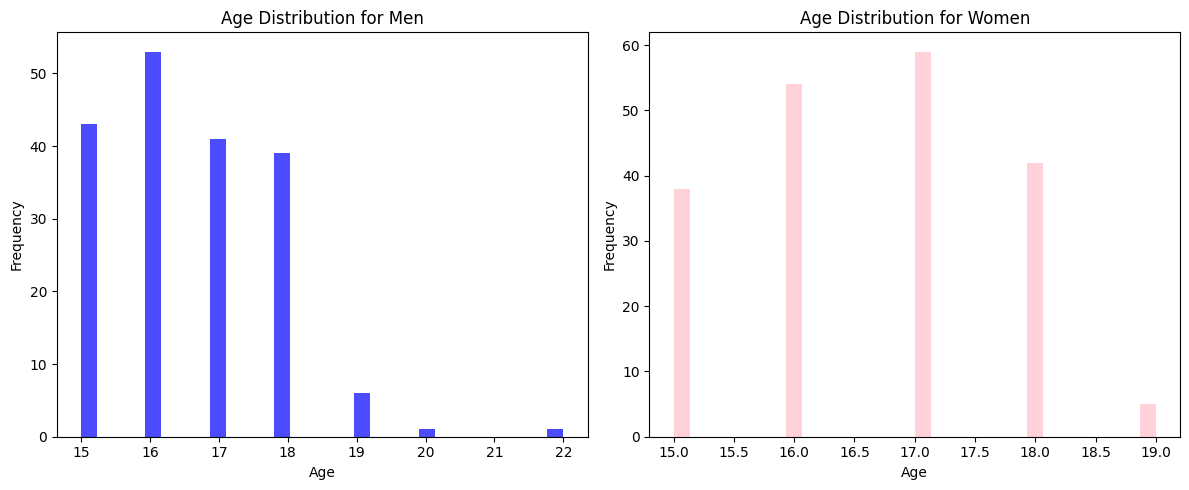

In [10]:
# 5. Visualize distributions for numerical columns using histograms

# Filter by sex
men = combined_data[combined_data['sex'] == 'M']
women = combined_data[combined_data['sex'] == 'F']

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for Men
ax[0].hist(men['age'], bins=30, color='blue', alpha=0.7)
ax[0].set_title('Age Distribution for Men')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Frequency')

# Histograma for Women
ax[1].hist(women['age'], bins=30, color='pink', alpha=0.7)
ax[1].set_title('Age Distribution for Women')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In the graph, we can observe a similar number of males and females; however, the majority of individuals are concentrated within the age range of 15 to 18 years. This suggests that this age group represents a significant portion of the dataset, indicating a possible focus on high school students or young adults in this educational context.

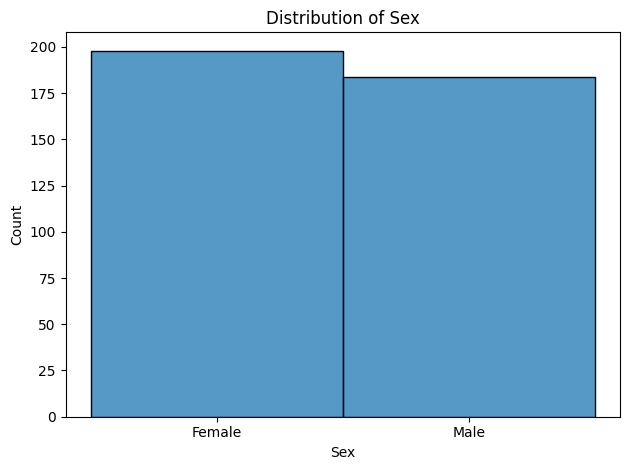

Total of Women: 198
Total of Men: 184


In [11]:
# 6. Visualize distributions for numerical columns using histograms
sns.histplot(combined_data.sex)
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])  # Adjust labels as necessary
plt.tight_layout()
plt.show()

# Count the total number of women and men
total_women = (combined_data['sex'] == 'F').sum()
total_men = (combined_data['sex'] == 'M').sum()

# Print the totals
print(f'Total of Women: {total_women}')
print(f'Total of Men: {total_men}')

## Data Visualization <a name="data-visualization"></a>
Data visualization is essential for understanding trends and patterns within our dataset. In this section, we will create various plots to visualize the relationships between different variables, such as alcohol consumption and academic performance. Through these visualizations, we aim to gain insights that can inform our analysis and decision-making processes.

To begin our analysis, we will evaluate the students' grades and explore the correlations between them. By examining the relationships among grades G1, G2, and G3, we can better understand how performance in earlier assessments may impact final outcomes. This analysis will provide a foundation for further exploration of the factors influencing academic success.

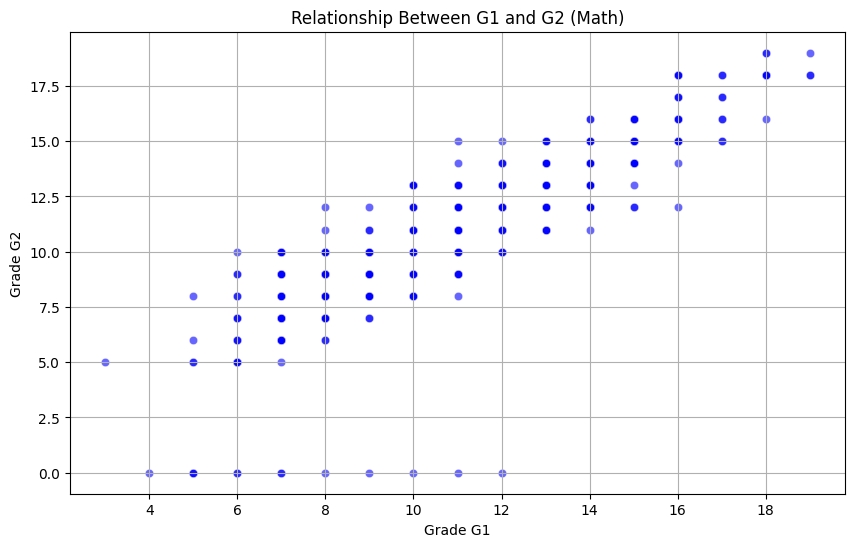

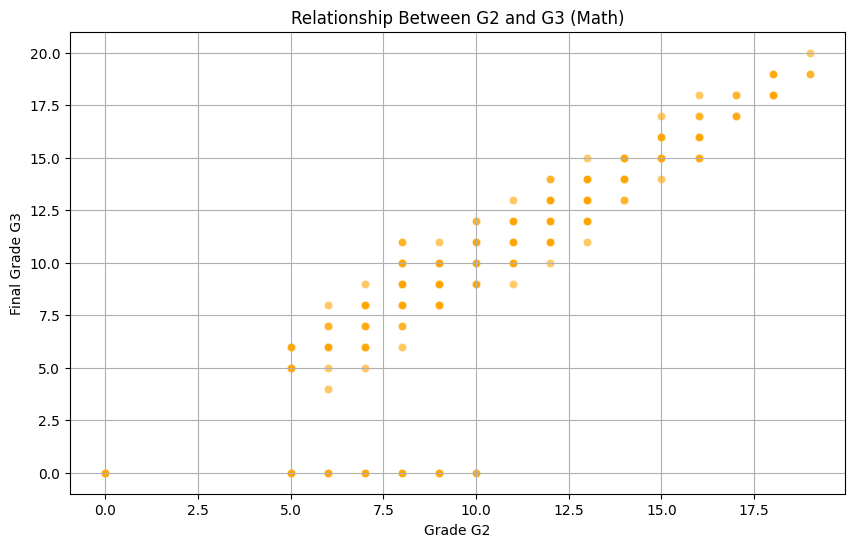

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data, x='G1_math', y='G2_math', color='blue', alpha=0.6)
plt.title('Relationship Between G1 and G2 (Math)')
plt.xlabel('Grade G1')
plt.ylabel('Grade G2')
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data, x='G2_math', y='G3_math', color='orange', alpha=0.6)
plt.title('Relationship Between G2 and G3 (Math)')
plt.xlabel('Grade G2')
plt.ylabel('Final Grade G3')
plt.grid()
plt.show()


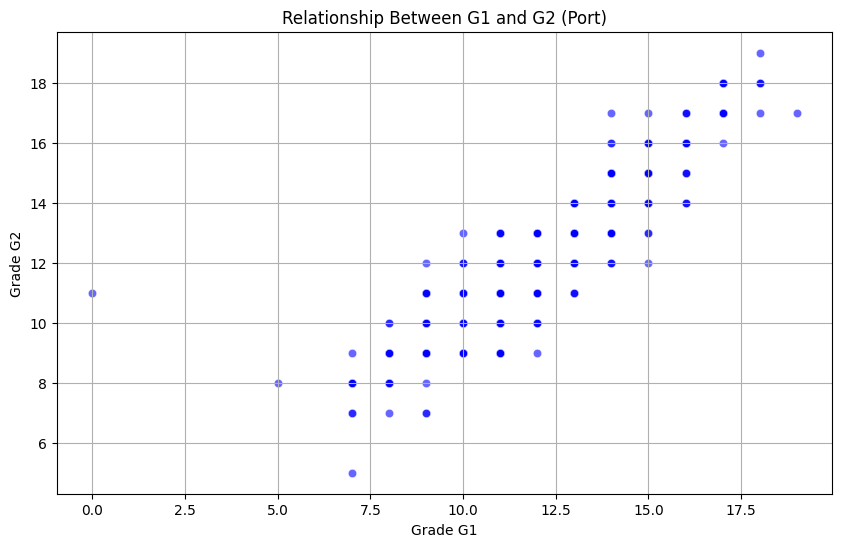

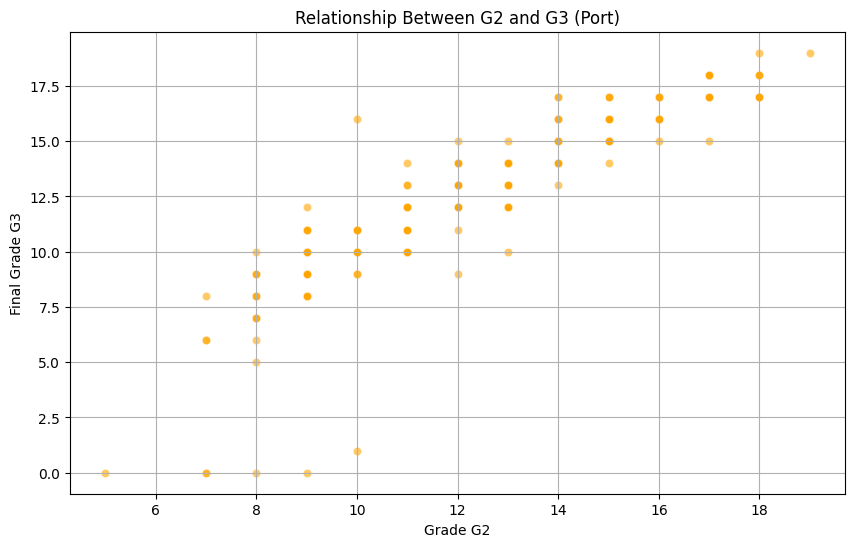

In [13]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data, x='G1_port', y='G2_port', color='blue', alpha=0.6)
plt.title('Relationship Between G1 and G2 (Port)')
plt.xlabel('Grade G1')
plt.ylabel('Grade G2')
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data, x='G2_port', y='G3_port', color='orange', alpha=0.6)
plt.title('Relationship Between G2 and G3 (Port)')
plt.xlabel('Grade G2')
plt.ylabel('Final Grade G3')
plt.grid()
plt.show()

According to the scatter plots, we can observe a strong positive correlation between the grades G1, G2, and G3. Another important factor to note is that there were students who achieved a grade in G1, but there is a noticeable increase in the number of students receiving a grade of 0 in G2 and G3. This could indicate that these students either did not take the exam or may have dropped out of the course. Next, we will investigate the distribution of these grades in more detail.

In [14]:
#  Students that probably quitted the school after 1st note (Math)
dropped_out_students_math = combined_data[
    (combined_data['G1_math'] != 0) & 
    (combined_data['G2_math'] == 0) & 
    (combined_data['G3_math'] == 0)
]

dropped_out_counts = dropped_out_students_math['school'].value_counts()

print(dropped_out_counts)

school
GP    13
Name: count, dtype: int64


In [15]:
# Defining the minimum passing average
min_passing_average = 10

# Filtering students who likely dropped out after the 2nd grade in Math
dropped_out_students_math = combined_data[
    (combined_data['G1_math'] != 0) & 
    (combined_data['G2_math'] != 0) & 
    (combined_data['G3_math'] == 0) &
    ((combined_data['G1_math'] + combined_data['G2_math']) / 2 < min_passing_average)  # Average of G1 and G2 less than 10
]

# Counting the number of students who dropped out by type of school
dropped_out_counts = dropped_out_students_math['school'].value_counts()

print(dropped_out_counts)

school
GP    19
MS     5
Name: count, dtype: int64


In [16]:
#  Students that probably quitted the school after 1st note (Port)
dropped_out_students_port = combined_data[
    (combined_data['G1_port'] != 0) & 
    (combined_data['G2_port'] == 0) & 
    (combined_data['G3_port'] == 0)
]

dropped_out_counts = dropped_out_students_port['school'].value_counts()

print(dropped_out_counts)

Series([], Name: count, dtype: int64)


In [17]:
# Defining the minimum passing average
min_passing_average = 10

# Filtering students who likely dropped out after the 2nd grade in Portuguese
dropped_out_students_port = combined_data[
    (combined_data['G1_port'] != 0) & 
    (combined_data['G2_port'] != 0) & 
    (combined_data['G3_port'] == 0) &
    ((combined_data['G1_port'] + combined_data['G2_port']) / 2 < min_passing_average)  # Average of G1 and G2 less than 10
]

# Counting the number of students who dropped out by type of school
dropped_out_counts = dropped_out_students_port['school'].value_counts()

# Printing the result
print(dropped_out_counts)

school
MS    4
Name: count, dtype: int64


According to the analyses conducted, we observed a significant number of students who dropped out after receiving their first grade in Mathematics, totaling 13 students, all of whom attended Gabriel Pereira School. This number increased to 19 after the second grade in the subject.

In relation to Portuguese, both schools exhibited similar dropout rates, with 5 students from Gabriel Pereira School and 4 students from Mousinho da Silveira School withdrawing from the course.

For this analysis, we excluded students who had already passed to the next academic year in the second semester and did not participate in the evaluation in the third semester. We utilized the data provided by the website: https://gradecalculator.io/portugal/.

In the next phase of our analysis, we will evaluate the relationship between alcohol consumption and the academic performance of the students. By examining the variables related to weekday (Dalc) and weekend (Walc) alcohol consumption, we aim to uncover any potential correlations with the students' grades (G1, G2, and G3).

Understanding how alcohol consumption impacts academic performance is crucial for identifying factors that may contribute to student success or challenges. We will conduct statistical analyses, including correlation assessments and visualizations, to determine whether higher levels of alcohol consumption are associated with lower academic performance.

This analysis will provide valuable insights that can inform strategies aimed at promoting healthier behaviors among students and enhancing their academic outcomes.

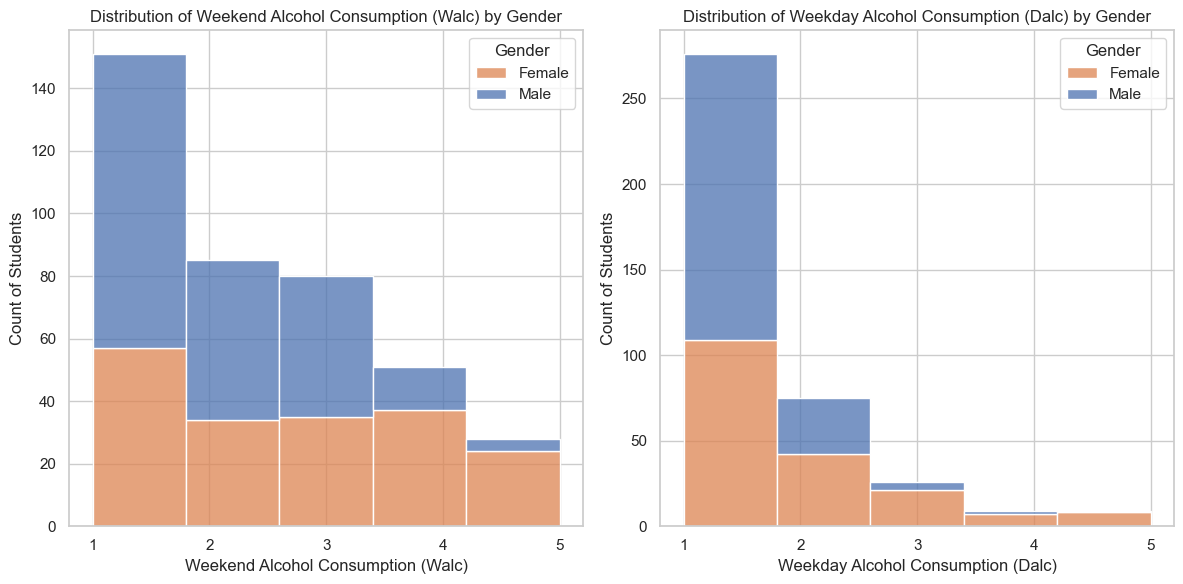

In [18]:
# Setting the seaborn style
sns.set(style="whitegrid")

# Creating the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Creating the histogram for Walc
sns.histplot(data=data_math, x='Walc', hue='sex', multiple='stack', bins=5, kde=False, ax=axes[0])
axes[0].set_title('Distribution of Weekend Alcohol Consumption (Walc) by Gender')
axes[0].set_xlabel('Weekend Alcohol Consumption (Walc)')
axes[0].set_ylabel('Count of Students')
axes[0].set_xticks([1, 2, 3, 4, 5])
axes[0].set_xticklabels(['1', '2', '3', '4', '5'])  # Adjusting the X-axis labels
axes[0].legend(title='Gender', labels=['Female', 'Male'], loc='upper right')

# Creating the histogram for Dalc
sns.histplot(data=data_math, x='Dalc', hue='sex', multiple='stack', bins=5, kde=False, ax=axes[1])
axes[1].set_title('Distribution of Weekday Alcohol Consumption (Dalc) by Gender')
axes[1].set_xlabel('Weekday Alcohol Consumption (Dalc)')
axes[1].set_ylabel('Count of Students')
axes[1].set_xticks([1, 2, 3, 4, 5])
axes[1].set_xticklabels(['1', '2', '3', '4', '5'])  # Adjusting the X-axis labels
axes[1].legend(title='Gender', labels=['Female', 'Male'], loc='upper right')

# Adjusting the layout
plt.tight_layout()

# Displaying the graphs
plt.show()

After this analysis, we can observe that alcohol consumption is significantly higher on weekends. It is also noteworthy that the level of alcohol consumption during the week is concentrated in the ranges of 1 and 2, which indicates low or negligible alcohol consumption. Since the index does not present a value for individuals who do not consume alcohol, we can presume that a considerable portion of the individuals marked with a consumption level of 1 are likely non-drinkers.

This insight highlights the difference in drinking behavior between weekdays and weekends, suggesting that students may engage in more social activities or leisure time during the weekends, leading to increased alcohol consumption. Conversely, the low consumption levels during the week could reflect a focus on academic responsibilities and a more restrained lifestyle.

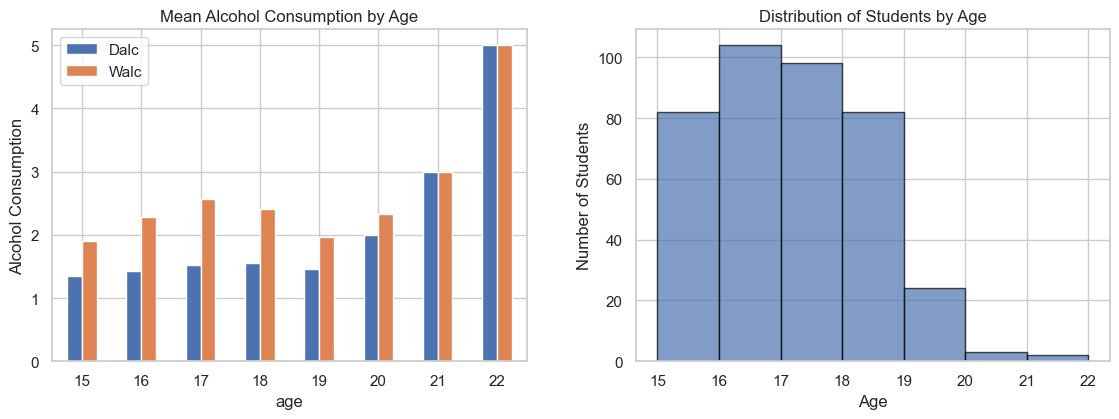

In [31]:
# Assuming you have already loaded the DataFrame 'data_math'

# Create the figure for the bar chart and histogram
plt.figure(figsize=(12, 5))  # Adjust the size of the figure

# Bar chart for average alcohol consumption by age
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
data_math.groupby('age')[['Dalc', 'Walc']].mean().plot(kind='bar', ax=plt.gca())
plt.ylabel('Alcohol Consumption')
plt.xticks(rotation=0)
plt.title('Mean Alcohol Consumption by Age')

# Histogram of the distribution of students by age
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
data_math['age'].hist(bins=range(15, 23), edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Number of Students')
plt.title('Distribution of Students by Age')
plt.xticks(range(15, 23))

# Adjust layout to add space between the plots
plt.tight_layout(pad=3.0)  # Adjust pad for spacing

# Display the plots
plt.show()

After conducting our analysis, we observed an interesting trend in alcohol consumption among students. Specifically, the data indicates that the alcohol consumption rate experiences a slight increase at the age of 17, followed by a decline. However, after the age of 20, there is a significant rise in consumption levels.

It is important to note, though, that the distribution of our data reveals a limited number of samples for students aged 19 and older. This scarcity of data points means that the observed increases in alcohol consumption after 20 years of age cannot be confidently regarded as a valid trend. Therefore, while these insights provide an intriguing perspective, further investigation with a larger sample size will be necessary to draw more robust conclusions.



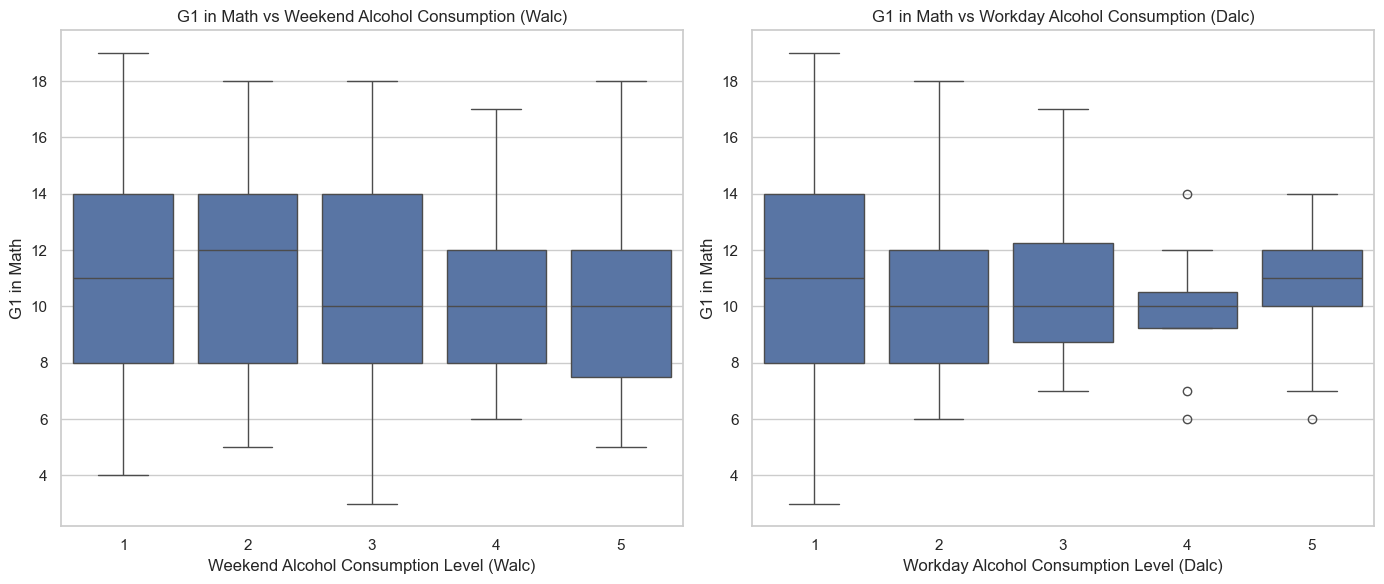

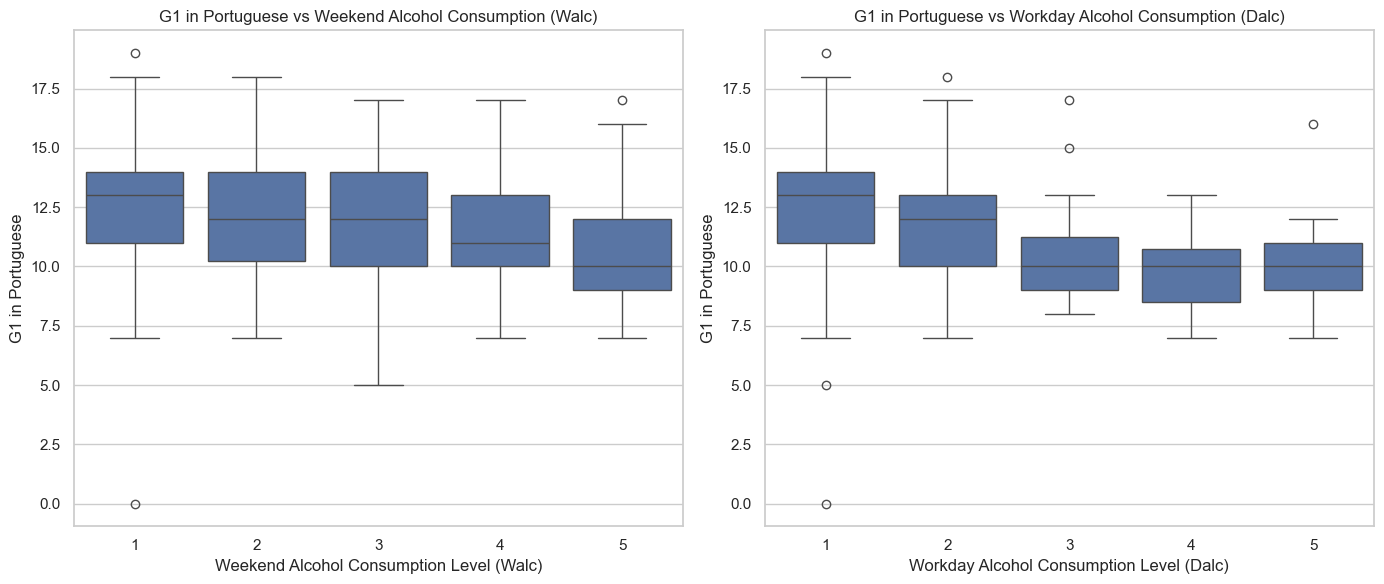

In [40]:
# Set the seaborn style
sns.set(style="whitegrid")

# Create a figure for the plots
plt.figure(figsize=(14, 6))

# Boxplot for G1_math vs Walc (Weekend Alcohol Consumption)
plt.subplot(1, 2, 1)
sns.boxplot(x='Walc_math', y='G1_math', data=combined_data)
plt.title('G1 in Math vs Weekend Alcohol Consumption (Walc)')
plt.xlabel('Weekend Alcohol Consumption Level (Walc)')
plt.ylabel('G1 in Math')

# Boxplot for G1_math vs Dalc (Workday Alcohol Consumption)
plt.subplot(1, 2, 2)
sns.boxplot(x='Dalc_math', y='G1_math', data=combined_data)
plt.title('G1 in Math vs Workday Alcohol Consumption (Dalc)')
plt.xlabel('Workday Alcohol Consumption Level (Dalc)')
plt.ylabel('G1 in Math')

# Adjust layout
plt.tight_layout()
plt.show()

# Create a new figure for Portuguese
plt.figure(figsize=(14, 6))

# Boxplot for G1_port vs Walc (Weekend Alcohol Consumption)
plt.subplot(1, 2, 1)
sns.boxplot(x='Walc_port', y='G1_port', data=combined_data)
plt.title('G1 in Portuguese vs Weekend Alcohol Consumption (Walc)')
plt.xlabel('Weekend Alcohol Consumption Level (Walc)')
plt.ylabel('G1 in Portuguese')

# Boxplot for G1_port vs Dalc (Workday Alcohol Consumption)
plt.subplot(1, 2, 2)
sns.boxplot(x='Dalc_port', y='G1_port', data=combined_data)
plt.title('G1 in Portuguese vs Workday Alcohol Consumption (Dalc)')
plt.xlabel('Workday Alcohol Consumption Level (Dalc)')
plt.ylabel('G1 in Portuguese')

# Adjust layout
plt.tight_layout()
plt.show()

The analysis of the generated boxplots reveals a clear and concerning trend: as levels of alcohol consumption, both during the week (Dalc) and on weekends (Walc), increase, students' grades in Mathematics (G1math) and Portuguese (G1port) tend to decrease.

In particular, the relationship between alcohol consumption during the week and grades is especially notable. Students who reported higher levels of alcohol consumption on weekdays exhibited significantly lower grades in both subjects. This trend suggests that alcohol consumption may be associated with poorer academic performance, potentially due to factors such as decreased concentration, impaired memory, and reduced study time.

These results emphasize the importance of addressing alcohol consumption among students and considering interventions that could promote healthier habits, thereby contributing to improved academic performance. Education about the effects of alcohol and encouraging extracurricular activities that do not involve alcohol consumption may be valuable strategies for enhancing academic outcomes.

# Conclusions

In this analysis, various characteristics of students were examined in relation to their influence on grades. Below are the main considerations:

- The majority of the analyzed students are adolescents, with ages ranging from 15 to 18 years, although there are some older students.

- It was observed that during the week, most students choose not to consume alcohol, with a small portion consuming only minimal amounts and an even smaller number reporting high consumption. However, this trend changes on weekends, where a significant proportion of students report some level of alcohol consumption, ranging from moderate to high.

- The students' grades exhibit a distribution resembling a normal pattern, demonstrating a strong correlation between the grades obtained in different periods and the final grade.

- Furthermore, the analysis revealed that male students tend to consume more alcohol than female students. It was also noted that with increasing age, alcohol consumption on weekends tends to rise, peaking during adolescence.

- Finally, the age and gender of the students do not appear to have a significant impact on their grades. However, alcohol consumption demonstrated an inversely proportional relationship with grades: those who consume alcohol in larger quantities tend to have lower academic performance.

## Conclusion and Next Steps <a name="conclusion-and-next-steps"></a>
In the final section, we will summarize our findings from the analysis and discuss potential next steps. This may include further analysis, model improvements, or recommendations for educators based on the insights gained from the data.